In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
from scipy.stats import skew, skewtest, norm
import scipy.stats as st
from scipy.stats import kurtosis
from scipy.stats import boxcox
import warnings
warnings.filterwarnings("ignore")

In [3]:
xc = pd.read_csv("C:\\Users\\Priyesh\\Downloads\\archive (3)\\petrol.csv")

In [3]:
xc.head()

,city,date,rate,state
0,Hyderabad,2011-12-01,73.07,Telangana
1,Hyderabad,2012-04-01,73.08,Telangana
2,Hyderabad,2012-05-24,81.44,Telangana
3,Hyderabad,2012-06-03,78.11,Telangana
4,Hyderabad,2012-06-29,74.89,Telangana


In [4]:
xc.tail()

,city,date,rate,state
5043,Mumbai,2020-12-27,90.3,Maharashtra
5044,Mumbai,2020-12-28,90.3,Maharashtra
5045,Mumbai,2020-12-29,90.3,Maharashtra
5046,Mumbai,2020-12-30,90.3,Maharashtra
5047,Mumbai,2020-12-31,90.3,Maharashtra


In [5]:
xc.dtypes

city      object
date      object
rate     float64
state     object
dtype: object

In [7]:
xc.describescribe()

,rate
count,5048.000000
mean,75.965413
std,8.146900
min,23.100000
25%,72.610000
50%,76.120000
75%,81.120000
max,91.390000


In [9]:
xc.isnull().sum()

city     0
date     0
rate     0
state    0
dtype: int64

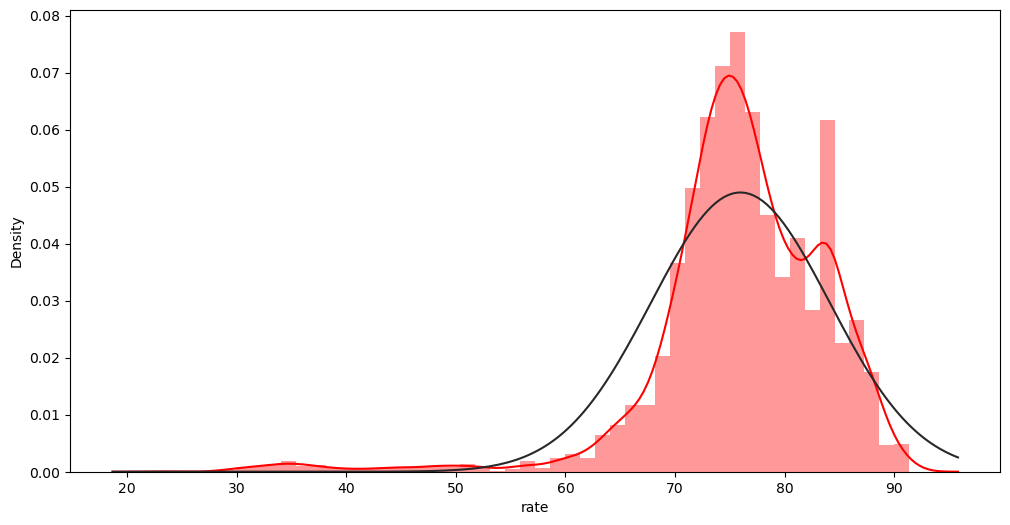

In [6]:
plt.figure(figsize=(12,6))
sns.distplot(xc['rate'],fit=norm, color ="r")
plt.show()

In [12]:
xc['rate'].describe()

count    5048.000000
mean       75.965413
std         8.146900
min        23.100000
25%        72.610000
50%        76.120000
75%        81.120000
max        91.390000
Name: rate, dtype: float64

Here we can see that Mean (75.965413) is smaller than the median(76.120000) and the maximum is few digits greater than the 75% (The distribution is negatively skewed).

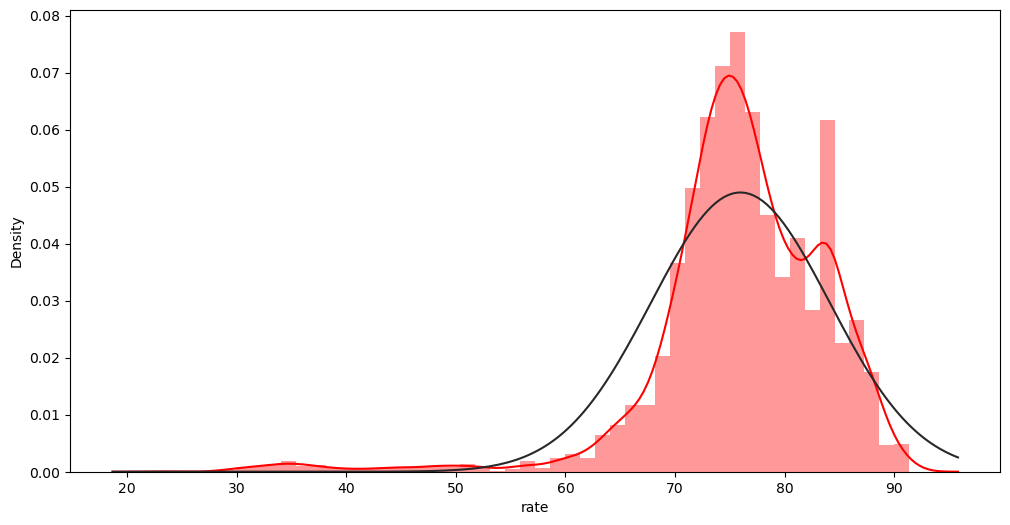

In [21]:
plt.figure(figsize=(12,6))
sns.distplot(xc['rate'],fit=norm, color ="r")
plt.show()

We can see by histogram that our dataset is negatively skewed.

In [15]:
# Checking Skewness & Kurtosis Value

print("Skew of raw data: %f" % xc['rate'].skew()) #check skewness
print("Kurtosis of raw data: %f" % kurtosis(xc['rate'],fisher = False)) #check kurtosis

Skew of raw data: -1.953847
Kurtosis of raw data: 10.872662


Here, skew of raw data is negative and lesser than 1 and kurtosis is greater than 3, right tail of the data is skewed. So, our data in this case is negatively skewed and lyptokurtic.
P.S. If we are keeping 'fisher=True', then kurtosis of normal distibution will be 0. Similarly, kurtosis >0 will be leptokurtic and kurtosis < 0 will be platykurtic

The method we'll be using to deal with the skewed data is: Log Transformation
(Here the Float data must be positive which is the primary condition of Log Transformation)

Skew after Log Transformation: -1.953847
Kurtosis after Log Transformation: 10.872662


count    5048.000000
mean       75.965413
std         8.146900
min        23.100000
25%        72.610000
50%        76.120000
75%        81.120000
max        91.390000
Name: rate, dtype: float64

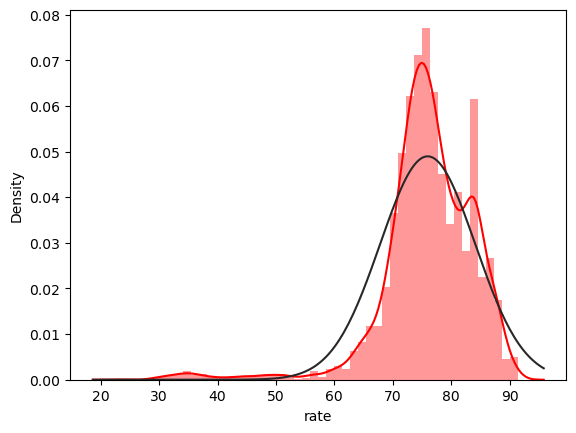

In [22]:
npp = np.log(xc['rate']) 

#check distribution,skewness and kurtosis
sns.distplot(xc['rate'], fit=norm,color ="r")
print("Skew after Log Transformation: %f" % xc['rate'].skew())
print("Kurtosis after Log Transformation: %f" % kurtosis(xc['rate'],fisher = False))
xc['rate'].describe()

Eventhough the data has aligned with the bell shaped curve. It still holds the Lepokurtic Distribution.
In order to get rid of that we will be using Power Function with power as 0.5 

<AxesSubplot:xlabel='rate', ylabel='Density'>

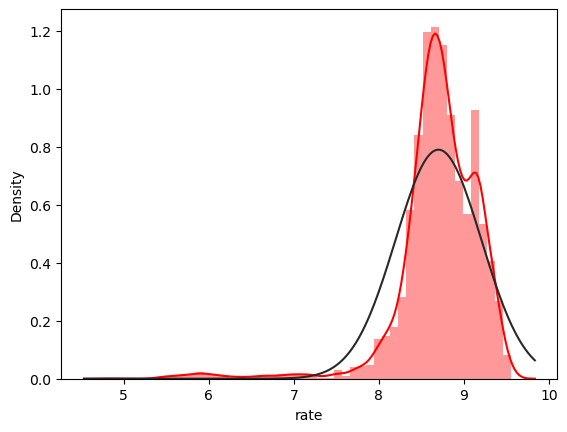

In [24]:
q = np.power(xc['rate'], 0.5)
sns.distplot(q, fit=norm,color ="r")

Data still has Lepokurtic Distribution. The other method could be use is Box Cox which won't discard the essential outliars.

Skew after box cox Transformation: -3.394990
kurt after box cox Transformation: 21.323003


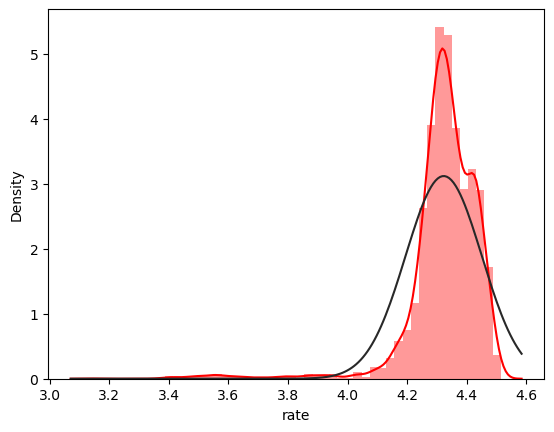

In [7]:
Box_cox = st.boxcox(xc['rate'],lmbda=0) 
sns.distplot(Box_cox,fit=norm, color ="r")
print("Skew after box cox Transformation: %f" % skew(Box_cox))
print("kurt after box cox Transformation: %f" % kurtosis(Box_cox,fisher = False))

Still having Lepokurtic Distribution, means we need to apply other method which should be stronger than
Box-Cox Method of Kurtosis. In that case we can go for the Yeo-Johnson Transformation.

<AxesSubplot:ylabel='Density'>

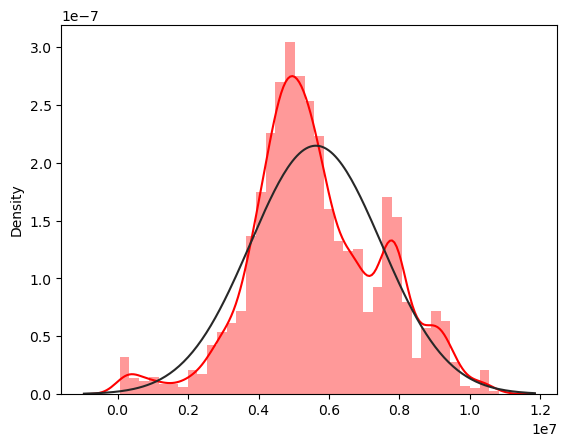

In [7]:
from scipy import stats 
df = stats.yeojohnson(xc['rate'])[0]

sns.distplot(df, fit=norm,color ="r")

In [8]:
print("Kurtosis of raw data: %f" % kurtosis(df,fisher = False)) 

Kurtosis of raw data: 3.244837


Checking Kurtosis Value which is now closer to 3

The data has been now closer to bell curve and good to go for different statistical method for modeling, although there are certain models which do not permit any outliers, in that case we will be clearing the outliars manually by removing upper and lower whisker values.

<AxesSubplot:>

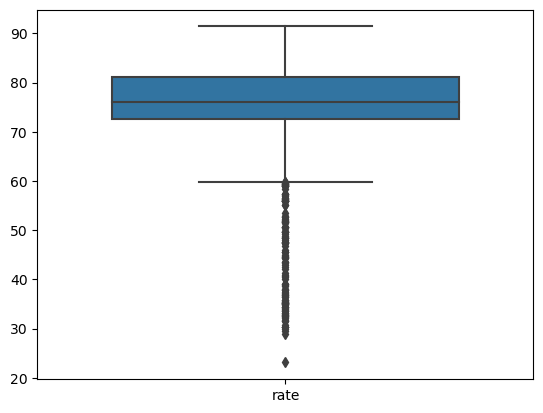

In [13]:
# Box Plotting to check outliers
sns.boxplot(data=xc, width=0.7)

<AxesSubplot:>

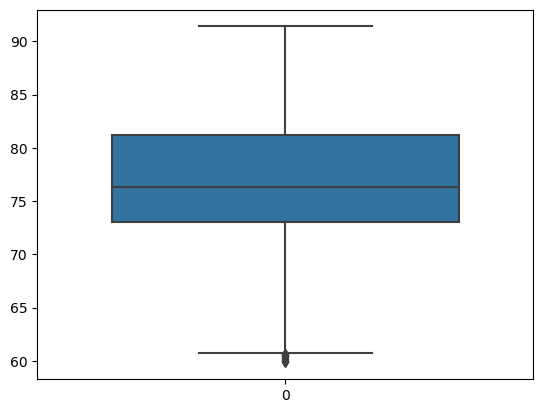

In [12]:
q1 = xc['rate'].quantile(0.25)
q3 = xc['rate'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Remove the outliers from 'rate' column
rate_clean = xc[(xc['rate'] >= lower_bound) & (xc['rate']<= upper_bound)]['rate']
# Boxploting the Clean Data
sns.boxplot(data=rate_clean, width=0.7)

<AxesSubplot:xlabel='rate', ylabel='Density'>

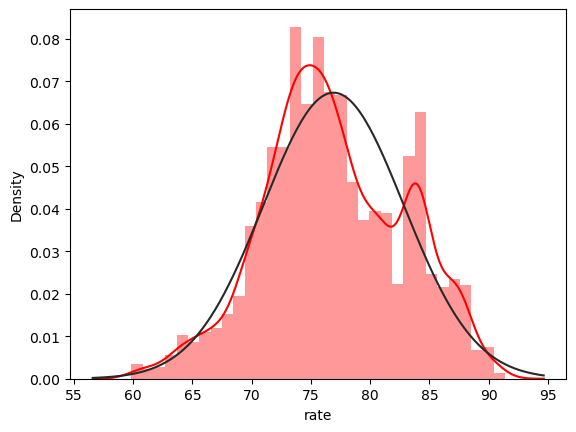

In [11]:
# Plot the distribution of cleaned 'rate' column
sns.distplot(rate_clean, fit=norm, color='r')

In [9]:
print("Kurtosis of raw data: %f" % kurtosis(rate_clean,fisher = False)) 

Kurtosis of raw data: 2.622623


Checking Kutosis Value which is now closer to 3 without holding outliers.

The data has been turned from Lepokurtic Distribution to Mesokurtic Distribution and good to go for models
that do not permit outliars.